In [22]:
# gerekli kütüphaneler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [23]:
# kaggle yüklendi
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
# digit-recognizer veri setini çek
!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [25]:
# veri setini oku
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [26]:
# eğitim verisi
x_train = train.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
y_train = train['label'].values


In [27]:
# test verisi
x_test = test.values.reshape(-1, 28, 28, 1)

# veriyi normalize etme
x_train, x_test = x_train / 255.0, x_test / 255.0

In [28]:
# CNN modeli oluştur
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# modeli eğit
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.8214 - loss: 0.6007 - val_accuracy: 0.9779 - val_loss: 0.0719
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9749 - loss: 0.0803 - val_accuracy: 0.9795 - val_loss: 0.0666
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.9844 - loss: 0.0500 - val_accuracy: 0.9869 - val_loss: 0.0422
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9881 - loss: 0.0362 - val_accuracy: 0.9880 - val_loss: 0.0416
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.9921 - loss: 0.0279 - val_accuracy: 0.9877 - val_loss: 0.0386


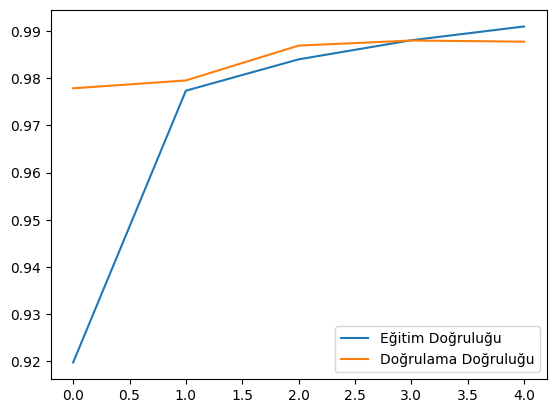

In [31]:
# eğitim sürecini görselleştir
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

In [32]:
# tahminler için
predictions = model.predict(x_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


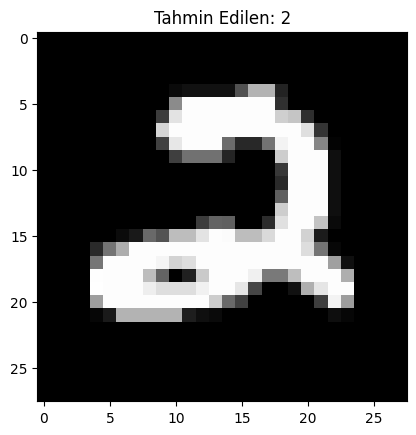

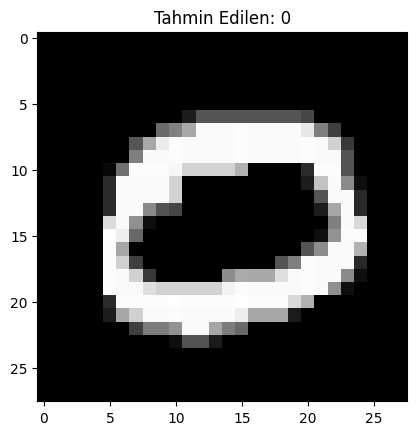

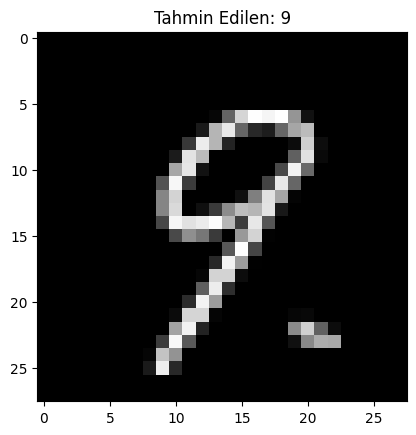

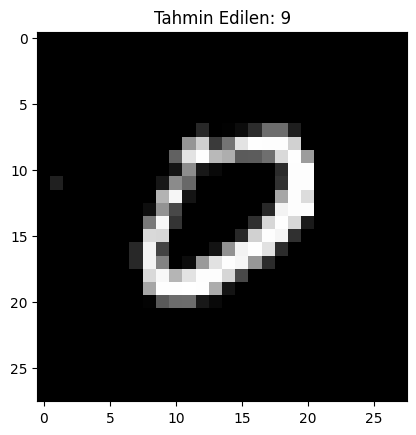

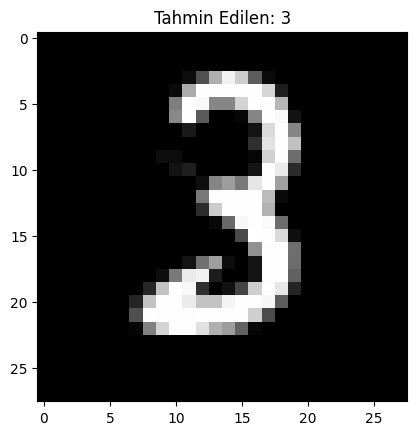

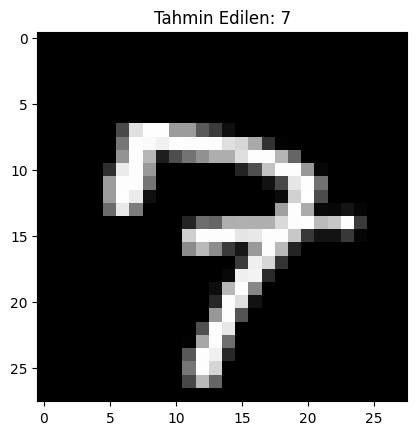

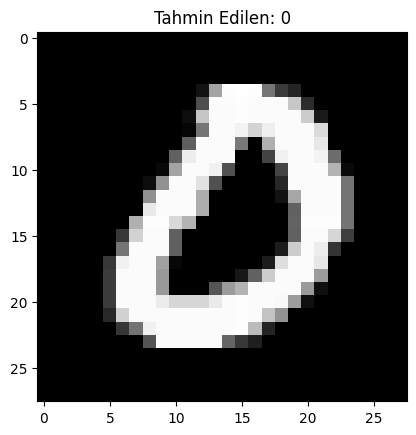

In [33]:
# ilk 7 tahmin
for i in range(7):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Tahmin Edilen: {tf.argmax(predictions[i])}")
    plt.show()